# Digit Recognition with PiCamera, Tensorflow, Keras, OpenCV, MNIST

Tutorial: https://www.hackster.io/dhq/ai-digit-recognition-with-picamera-2c017f  
Git: https://github.com/Q-point/PiCamera-Digit-Recognizer

## 1. Install Open-CV 3.3

https://www.pyimagesearch.com/2017/09/04/raspbian-stretch-install-opencv-3-python-on-your-raspberry-pi/

## 2. Training with Keras and MNIST Dataset

In [1]:
# 1. Install Keras
# 2. Install tensorflow GPU

# 3. Import libraries and modules
#Trains a simple convnet on the MNIST dataset.
#Gets to 99.25% test accuracy after 12 epochs

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [20]:
from IPython.display import Image

In [2]:
batch_size = 128
num_classes = 10
epochs = 12

In [3]:
# 4. Load pre-shuffled MNIST data into train and test sets
# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

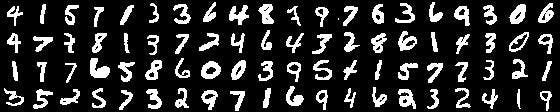

In [23]:
Image(filename='./MNIST_sample.jpg', width=600) 

In [4]:
# 5. Preprocess input data
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [5]:
# 6. Preprocess class labels
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [9]:
# 7. Define model architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

The main network topology can be described by this image below:

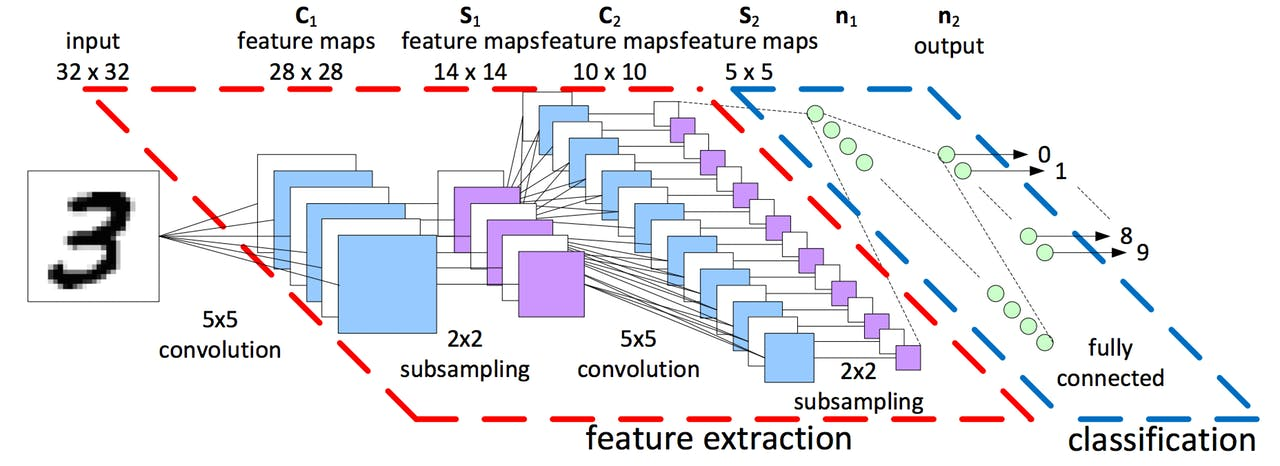

In [24]:
Image(filename='./MNIST_Digit_Recognition_DNN_structure.png', width=1200)

The last layer is a fully connected layer which maps to 10 categories representing the 10 digits.

We are going to do two things. First we train a network for recognizing digits. Then we use the weights of the network we trained for recognizing live camera feed digits taken from the Raspberry Pi camera.

In [10]:
# 8. Compile model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [11]:
# 9. Fit model on training data
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 77s 1ms/step - loss: 0.2727 - acc: 0.9159 - val_loss: 0.0645 - val_acc: 0.9798
Epoch 2/12
60000/60000 [==============================] - 79s 1ms/step - loss: 0.0879 - acc: 0.9739 - val_loss: 0.0412 - val_acc: 0.9857
Epoch 3/12
60000/60000 [==============================] - 81s 1ms/step - loss: 0.0672 - acc: 0.9797 - val_loss: 0.0319 - val_acc: 0.9887
Epoch 4/12
60000/60000 [==============================] - 80s 1ms/step - loss: 0.0547 - acc: 0.9838 - val_loss: 0.0312 - val_acc: 0.9896
Epoch 5/12
60000/60000 [==============================] - 79s 1ms/step - loss: 0.0458 - acc: 0.9864 - val_loss: 0.0297 - val_acc: 0.9895
Epoch 6/12
60000/60000 [==============================] - 79s 1ms/step - loss: 0.0413 - acc: 0.9875 - val_loss: 0.0285 - val_acc: 0.9901
Epoch 7/12
60000/60000 [==============================] - 79s 1ms/step - loss: 0

In [12]:
# 10. Evaluate model on test data
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.025379192673920626
Test accuracy: 0.9922


In [13]:
# 11. Save model
model.save('mnist_trained_model.h5') # creates a HDF5 file